In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from functions import criar_Perceptron,criar_MLP,dividir_dados
import os
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit

2025-01-22 15:35:19.688673: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-22 15:35:19.705788: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-22 15:35:19.710525: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-22 15:35:19.722402: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
dados = pd.read_csv("dados/dados_imperfeito_exponencial.csv")
del dados['Unnamed: 0']
dados

,comprimento de onda,cor
0,466.824083,azul
1,463.238784,azul
2,464.260074,azul
3,467.007274,azul
4,467.347147,azul
...,...,...
195,589.751740,verde
196,594.242247,verde
197,589.567499,verde
198,593.377223,verde


In [3]:
# Cria a camada de normalização
normalization_layer = keras.layers.Normalization(axis=-1)

# Adapta a camada aos dados (necessário para calcular a média e o desvio padrão)
normalization_layer.adapt(dados['comprimento de onda'].values.reshape(-1, 1))

I0000 00:00:1737570921.995306   59033 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1737570922.036700   59033 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1737570922.036950   59033 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1737570922.038070   59033 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [4]:
encoder = OneHotEncoder()
cor_encoded = encoder.fit_transform(dados['cor'].values.reshape(-1,1))
cor_encoded.toarray()

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [5]:
dados['cor encoded'] = cor_encoded.toarray()[:,0].copy()
dados

,comprimento de onda,cor,cor encoded
0,466.824083,azul,1.0
1,463.238784,azul,1.0
2,464.260074,azul,1.0
3,467.007274,azul,1.0
4,467.347147,azul,1.0
...,...,...,...
195,589.751740,verde,0.0
196,594.242247,verde,0.0
197,589.567499,verde,0.0
198,593.377223,verde,0.0


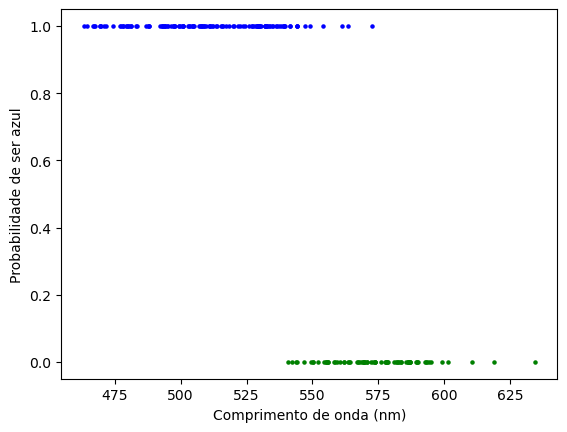

In [6]:
azul = dados[dados['cor']=='azul']
verde = dados[dados['cor']=='verde']

plt.scatter(azul['comprimento de onda'],azul['cor encoded'],color='blue',s=5)
plt.scatter(verde['comprimento de onda'],verde['cor encoded'],color='green',s=5)
plt.ylabel('Probabilidade de ser azul')
plt.xlabel('Comprimento de onda (nm)')
plt.savefig('imagens/nao linearmente separavel.png')

In [7]:
dados

,comprimento de onda,cor,cor encoded
0,466.824083,azul,1.0
1,463.238784,azul,1.0
2,464.260074,azul,1.0
3,467.007274,azul,1.0
4,467.347147,azul,1.0
...,...,...,...
195,589.751740,verde,0.0
196,594.242247,verde,0.0
197,589.567499,verde,0.0
198,593.377223,verde,0.0


In [8]:
x_train,y_train,x_test,y_test,strat_train_set,strat_test_set = dividir_dados(dados)

In [9]:
learning_rate_exponent = 3

path_perceptron = f'modelos/perceptron_exponencial_{learning_rate_exponent}.keras'
path_mlp = f'modelos/MLP_exponencial_{learning_rate_exponent}.keras'

if not os.path.exists(path_mlp):
    MLP = criar_MLP(x_train, strat_train_set, 1 / 10**learning_rate_exponent)
    MLP.save(path_mlp)
else:
    MLP = keras.models.load_model(path_mlp)
if not os.path.exists(path_perceptron):
    Perceptron = criar_Perceptron(x_train,strat_train_set,learning_rate=1/10**learning_rate_exponent)
    Perceptron.save(path_perceptron)
else:
    Perceptron = keras.models.load_model(path_perceptron)

In [10]:
MLP.fit(x_train,y_train,epochs=100)

Epoch 1/100


I0000 00:00:1737570922.854121   62012 service.cc:146] XLA service 0x7022a8005500 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1737570922.854143   62012 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce MX250, Compute Capability 6.1
2025-01-22 15:35:22.867074: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-01-22 15:35:22.895622: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90101


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0762 - loss: 0.7117   
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1558 - loss: 0.7039 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2778 - loss: 0.6979 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6448 - loss: 0.6911 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8734 - loss: 0.6840 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9669 - loss: 0.6770 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9482 - loss: 0.6721 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9645 - loss: 0.6655 
Epoch 9/100


I0000 00:00:1737570923.596136   62012 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9660 - loss: 0.6603 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9569 - loss: 0.6550 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9464 - loss: 0.6463 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9417 - loss: 0.6426 
Epoch 13/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9373 - loss: 0.6356 
Epoch 14/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9521 - loss: 0.6301 
Epoch 15/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9326 - loss: 0.6251 
Epoch 16/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9330 - loss: 0.6210 
Epoch 17/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9668 - loss: 0.6139 
Epoch 18/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9334 - loss: 0.6150 
Epoch 19/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9404 - loss: 0.6027 
Epoch 20/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9365 - loss: 0

In [12]:
Perceptron.fit(x_train,y_train,epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0704 - loss: 1.5443  
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0878 - loss: 1.5222 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1177 - loss: 1.5058 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0734 - loss: 1.5679     
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0908 - loss: 1.4541 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0930 - loss: 1.5339 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0891 - loss: 1.5439 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0873 - loss: 1.4968 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1008 - loss: 1.4285 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1047 - loss: 1.4816 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0904 - loss: 1.4816 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1025 

In [13]:
np.argmax(Perceptron.predict(x_test),axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


array([1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1])

In [14]:
resultado = np.argmax(y_test,axis=1)
predito = np.argmax(MLP.predict(x_test),axis=1)


# Calcula a acurácia diretamente
accuracy = np.mean(resultado == predito)
print(f"Acurácia com mlp: {accuracy}")

predito = np.argmax(Perceptron.predict(x_test),axis=1)

accuracy = np.mean(resultado==predito)

print(f'Acurácia do Perceptron: {accuracy}')


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
Acurácia com mlp: 0.925
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Acurácia do Perceptron: 0.225


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


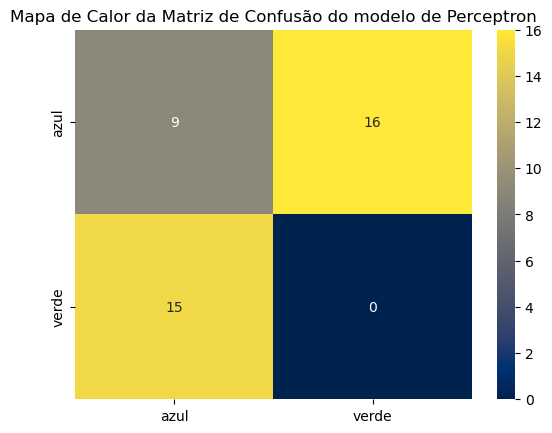

In [15]:
labels = ('azul','verde')
predito = np.argmax(Perceptron.predict(x_test),axis=1)
sns.heatmap(confusion_matrix(resultado,
                             predito),
                             xticklabels=labels,
                             yticklabels=labels,annot=True,
                             cmap='cividis',
                             )
title = "Mapa de Calor da Matriz de Confusão do modelo de Perceptron"
plt.title(title)
plt.savefig(f'imagens/{title}.png')

In [16]:
predito = np.argmax(MLP.predict(x_test),axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


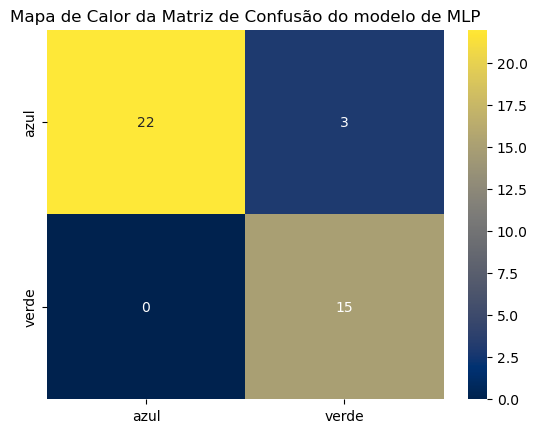

In [17]:
labels = ('azul','verde')
predito = np.argmax(MLP.predict(x_test),axis=1)
sns.heatmap(confusion_matrix(resultado,
                             predito),
                             xticklabels=labels,
                             yticklabels=labels,annot=True,
                             cmap='cividis',
                             )
title = "Mapa de Calor da Matriz de Confusão do modelo de MLP"
plt.title(title)
plt.savefig(f'imagens/{title}.png')

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


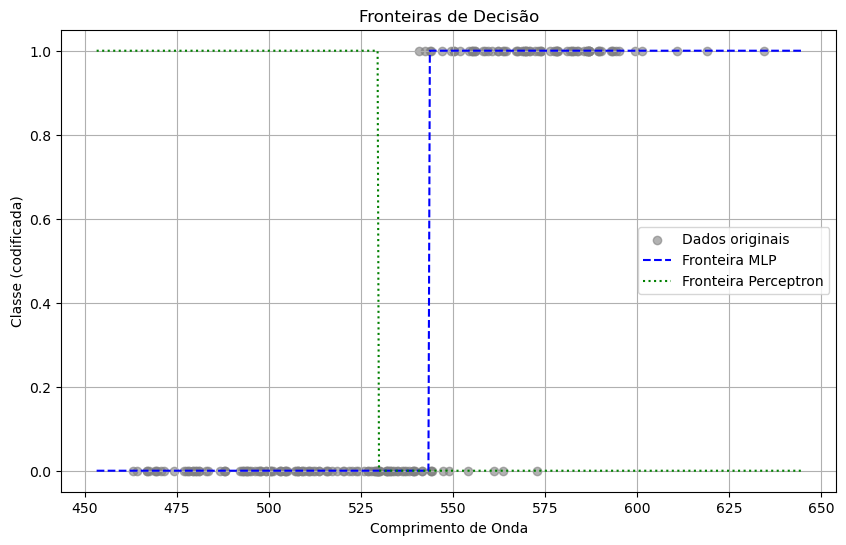

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Gera uma malha de pontos
x_min, x_max = dados['comprimento de onda'].min() - 10, dados['comprimento de onda'].max() + 10
xx = np.linspace(x_min, x_max, 500).reshape(-1, 1)

# Predição para os modelos
mlp_pred = np.argmax(MLP.predict(xx), axis=1)
perceptron_pred = np.argmax(Perceptron.predict(xx), axis=1)

# Converte as classes para rótulos
encoder = LabelEncoder()
encoder.fit(['azul', 'verde'])

# Plota as fronteiras de decisão
plt.figure(figsize=(10, 6))
plt.scatter(dados['comprimento de onda'], encoder.transform(dados['cor']), c='gray', label='Dados originais', alpha=0.6)
plt.plot(xx, mlp_pred, label="Fronteira MLP", color="blue", linestyle="--")
plt.plot(xx, perceptron_pred, label="Fronteira Perceptron", color="green", linestyle=":")
plt.title("Fronteiras de Decisão")
plt.xlabel("Comprimento de Onda")
plt.ylabel("Classe (codificada)")
plt.legend()
plt.grid(True)
plt.savefig("imagens/fronteiras_decisao.png")
plt.show()
